## Import modules

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/rfs/project/rfs-iCNyzSAaucw/kk837/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [5]:
figdir = '/home/kk837/rfs/rfs-teichlab-nfs-iCNyzSAaucw/kk837/notebooks/Foetal/fetal_ms_figures'

In [6]:
coord_columns = ('window_col', 'window_row')
list(coord_columns)

['window_col', 'window_row']

# Read in qeury adata

In [21]:
# read in 
sample_id = 'HEA_FOET14880396'
celltype_col = 'fine_grain_4Jan2025'
adata = sc.read_h5ad(f'/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/VisiumHD/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025', 'HistologicalAnnotation', 'SANaxis_landmarks', 'SAN_axis', 'SAN_axis_bin_annot', 'tt_prediction'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HistologicalAnnotati

In [22]:
adata.X.data[:5]

array([1.27187559, 1.95641568, 1.75023687, 1.96760567, 2.7810601 ])

In [23]:
# update cell type name for plotting
df = pd.read_csv('/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/finegrain_name_mapping.csv')
celltype_mapping = df.set_index('Full_name')['Short_name_finalised'].to_dict()
adata.obs.replace({celltype_col:{
    'SinoatrialNodePacemakerCellsHorn':'SinusHornPacemakerCells'
}},inplace=True)
adata.obs.replace({celltype_col:celltype_mapping},inplace=True)


/tmp/ipykernel_240910/4045961491.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs.replace({celltype_col:{
/tmp/ipykernel_240910/4045961491.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs.replace({celltype_col:celltype_mapping},inplace=True)


# Read in reference adata

In [11]:
adata_ref = sc.read_h5ad('/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/Visium/visium_foetal_healthy-all_cell2loc-adata.h5ad')
adata_ref

AnnData object with n_obs × n_vars = 39223 × 58
    obs: 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'status', 'cell2loc-map_group', 'JC_edit', 'sample_for_cell2loc', 'week', 'leiden', 'annotation_final', 'annotation_final_mod'
    uns: 'JC_edit_colors', 'annotation_colors', 'annotation_final_colors', 'cell2loc-map_group_colors', 'leiden', 'neighbors', 'region_cluster_colors', 'sample_for_cell2loc_colors', 'umap'
    obsm: 'MT', 'X_umap', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q05_cell_abundance_w_sf_ndarray', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    obsp: 'connec

In [12]:
# update cell type name
df = pd.read_csv('/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/finegrain_name_mapping.csv')
celltype_mapping = df.set_index('Full_name')['Short_name_finalised'].to_dict()
adata_ref.var_names = [celltype_mapping[x] for x in adata_ref.var_names]

# Harmonise cell type names

In [27]:
celltype_mapping_2 = {
    'BMS4':'B',
    'CorAdvFB':'FB',
    'GVAdvFB':'FB',
    'MonoMPO':'Mono',
    'MyoFB':'FB',
    'MyoFb':'FB',
     'ProB':'B',
    'SubEpiFb':'FB',
    'vCMCL':'vCMC',
    'vCMCR':'vCMC',
    'vCMTL':'vCMT',
    'vCMTR':'vCMT',
    'FBCOL2A1':'FB',
    'GVSMCP':'GVSMC',
    'GVSMCT':'GVSMC',
    'SANPCHd':'SANPC',
     'SHPC':'SANPC',
     'SANPCTl':'SANPC',
}
adata.obs[celltype_col] = [celltype_mapping_2[x] if x in celltype_mapping_2.keys() else x for x in adata.obs[celltype_col]]
adata_ref.var_names = [celltype_mapping_2[x] if x in celltype_mapping_2.keys() else x for x in adata_ref.var_names]

In [28]:
set(adata_ref.var_names) - set(adata.obs[celltype_col])

{'DCMat',
 'DCT1',
 'LNFRC',
 'MPATF3',
 'MPTIMD4',
 'MastC',
 'NK',
 'TCD4',
 'TCD8',
 'Treg',
 'pDC'}

In [29]:
set(adata.obs[celltype_col]) - set(adata_ref.var_names)

{'Eryth',
 'Fibroblasts_DoubletsWithCMs',
 'PericFib',
 'PericInt',
 'PericardialCells_DoubletsWithCMs',
 'SchwNeuro',
 'VentricularCardiomyocytes_Doublets',
 'VentricularCardiomyocytes_DoubletsWithErythrocytes',
 'unassigned'}

# Calculate cell type proportions per niche

### Query

In [30]:
ctab = pd.crosstab(adata.obs[celltype_col],adata.obs['tt_prediction'])
prop_df = (ctab/ctab.sum(axis=0))
prop_df.sum(axis=0)

tt_prediction
AV ring                      1.0
AVnode                       1.0
Adventitia - GV              1.0
Atrium                       1.0
Coronary vessel              1.0
Ductus arteriosus            1.0
Endocardial cusion           1.0
Endocardium - Atrial         1.0
Endocardium - Ventricular    1.0
Epicardium                   1.0
Great vessel                 1.0
SAnode                       1.0
VCS - Distal                 1.0
VCS - Proximal               1.0
Valves                       1.0
Ventricle - Compact          1.0
Ventricle - Trabeculated     1.0
dtype: float64

In [31]:
prop_df.head()

tt_prediction,AV ring,AVnode,Adventitia - GV,Atrium,Coronary vessel,Ductus arteriosus,Endocardial cusion,Endocardium - Atrial,Endocardium - Ventricular,Epicardium,Great vessel,SAnode,VCS - Distal,VCS - Proximal,Valves,Ventricle - Compact,Ventricle - Trabeculated
fine_grain_4Jan2025,,,,,,,,,,,,,,,,,
AVNPC,0.006406,0.704748,0.000289,0.058735,0.0000,0.0,0.0,0.021351,0.001018,0.001898,0.000087,0.023092,0.029121,0.024153,0.0,0.000503,0.000114
B,0.000000,0.000000,0.000578,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000348,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
ChromC,0.000000,0.000000,0.010696,0.000000,0.0096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
CorArtEC,0.000000,0.000000,0.000000,0.000000,0.0304,0.0,0.0,0.002100,0.000000,0.000474,0.016712,0.000000,0.000000,0.000000,0.0,0.000023,0.000000
CorCapEC,0.000000,0.004451,0.018460,0.012016,0.0208,0.0,0.0,0.004900,0.000000,0.013757,0.000261,0.012187,0.000000,0.003837,0.0,0.003634,0.000114


### Reference

In [32]:
df = adata_ref.to_df()
df['annotation_final_mod'] = adata_ref.obs['annotation_final_mod'].copy()
df = df.groupby('annotation_final_mod').sum()
df = df.groupby(df.columns, axis=1).sum()

prop_df_ref = (df.T/df.sum(axis=1))
prop_df_ref.sum(axis=0)

/tmp/ipykernel_240910/4260203183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('annotation_final_mod').sum()
/tmp/ipykernel_240910/4260203183.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(df.columns, axis=1).sum()


annotation_final_mod
Atrium                       1.0
Ventricle - Compact          1.0
Ventricle - Trabeculated     1.0
SAnode                       1.0
AVnode                       1.0
VCS - Proximal               1.0
VCS - Distal                 1.0
Great vessel                 1.0
Coronary vessel              1.0
Ductus arteriosus            1.0
Adventitia - Coronary        1.0
Adventitia - GV              1.0
Epicardium                   1.0
Endocardium - Atrial         1.0
Endocardium - Ventricular    1.0
Endocardial cusion           1.0
AV ring                      1.0
Valves                       1.0
LN                           1.0
dtype: float64

In [33]:
prop_df_ref.head()

annotation_final_mod,Atrium,Ventricle - Compact,Ventricle - Trabeculated,SAnode,AVnode,VCS - Proximal,VCS - Distal,Great vessel,Coronary vessel,Ductus arteriosus,Adventitia - Coronary,Adventitia - GV,Epicardium,Endocardium - Atrial,Endocardium - Ventricular,Endocardial cusion,AV ring,Valves,LN
AVNPC,0.049391,0.008824,0.006031,0.066867,0.257397,0.027428,0.017711,0.000826,0.001267,0.000080,0.006121,0.000231,0.013305,0.057869,0.012058,0.002644,0.020071,0.006954,0.000124
B,0.003832,0.004105,0.003595,0.003008,0.005350,0.003809,0.003644,0.002688,0.004255,0.002257,0.010532,0.004369,0.005270,0.002823,0.003977,0.006229,0.005051,0.003404,0.051110
ChromC,0.000785,0.000595,0.000283,0.002291,0.004937,0.001543,0.000891,0.001612,0.001438,0.002841,0.000727,0.007240,0.002042,0.000747,0.000758,0.000553,0.001039,0.001594,0.000064
CorArtEC,0.001481,0.000617,0.000728,0.001772,0.000800,0.000689,0.000749,0.008594,0.042080,0.015306,0.006761,0.005514,0.002501,0.000770,0.000549,0.000601,0.000458,0.000327,0.000653
CorCapEC,0.024028,0.042065,0.026258,0.013467,0.009804,0.019216,0.002375,0.001572,0.014103,0.000885,0.027804,0.009390,0.043806,0.001876,0.005360,0.001364,0.001297,0.002236,0.003285


# Subset shared cell types

In [34]:
# shared cell types
shared = [x for x in prop_df.index if x in prop_df_ref.index]
print(len(shared))
prop_df = prop_df.loc[shared]
prop_df_ref = prop_df_ref.loc[shared]

38


In [35]:
# shared niches
shared = [x for x in prop_df.columns if x in prop_df_ref.columns]
print(len(shared))
prop_df = prop_df[shared]
prop_df_ref = prop_df_ref[shared]

17


In [36]:
print(prop_df.shape)
print(prop_df_ref.shape)

(38, 17)
(38, 17)


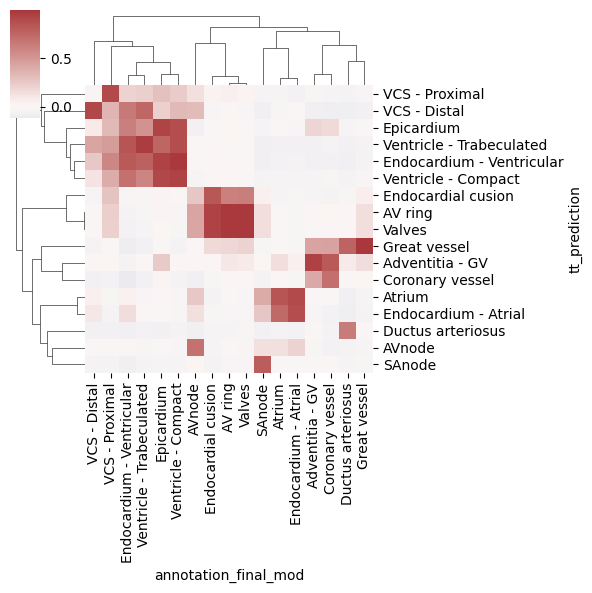

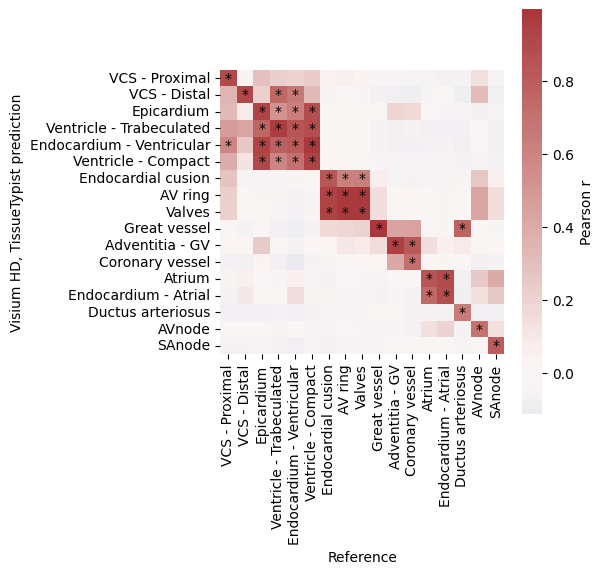

CPU times: user 932 ms, sys: 236 ms, total: 1.17 s
Wall time: 7.21 s


In [38]:
%%time
corr, pval = utils.df_pearson_corr_with_p_vectorized(prop_df, prop_df_ref, p_adjust='fdr_bh')

# draw the initial clustermap (for ordering only)
cg = sns.clustermap(
    corr,
    cmap='vlag',
    center=0,
    metric='euclidean',
    method='average',
    figsize=(6, 6)
)

# 4) extract the leaf order and reindex both matrices
order = cg.dendrogram_row.reordered_ind
labels = list(corr.index[order])

corr_ord = corr.loc[labels, labels]
pval_ord = pval.loc[labels, labels]

# 5) replot as a heatmap and annotate significance
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    corr_ord,
    cmap='vlag',
    center=0,
    square=True,
    cbar_kws={'label': 'Pearson r'},
    ax=ax
)

# add asterisks for p < 0.01
n = corr_ord.shape[0]
for i in range(n):
    for j in range(n):
        if pval_ord.iat[i, j] < 0.01:
            ax.text(j + 0.5, i + 0.5, '*',
                    ha='center', va='center',
                    fontsize=10)

ax.set_xticklabels(labels, rotation=90)
ax.set_xlabel('Reference')
ax.set_yticklabels(labels, rotation=0)
ax.set_ylabel('Visium HD, TissueTypist prediction')
plt.tight_layout()
plt.savefig(f'{figdir}/TissueTypist_celltype-prop-corr_VisiumHD.pdf', bbox_inches="tight",dpi=300)
plt.show()